In [1]:
import numpy as np 
import pandas as pd 

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors


In [3]:
df = pd.read_csv('books (1).csv' ,on_bad_lines = 'skip')
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [4]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [6]:
df.shape

(11123, 12)

In [7]:
#checking for null values
df.isnull().sum().sum()

0

**EXPLORATORY DATA ANALYSIS**

In [8]:
top_10_books = df[df['ratings_count']>1000000].sort_values(by = 'ratings_count', ascending = False).head(10)
top_10_books['title']

10336                              Twilight (Twilight  #1)
1697                   The Hobbit  or There and Back Again
1462                                The Catcher in the Rye
307                   Angels & Demons (Robert Langdon  #1)
3        Harry Potter and the Prisoner of Azkaban (Harr...
4415     Harry Potter and the Chamber of Secrets (Harry...
1        Harry Potter and the Order of the Phoenix (Har...
23       The Fellowship of the Ring (The Lord of the Ri...
2114                                           Animal Farm
0        Harry Potter and the Half-Blood Prince (Harry ...
Name: title, dtype: object

<Axes: xlabel='average_rating', ylabel='title'>

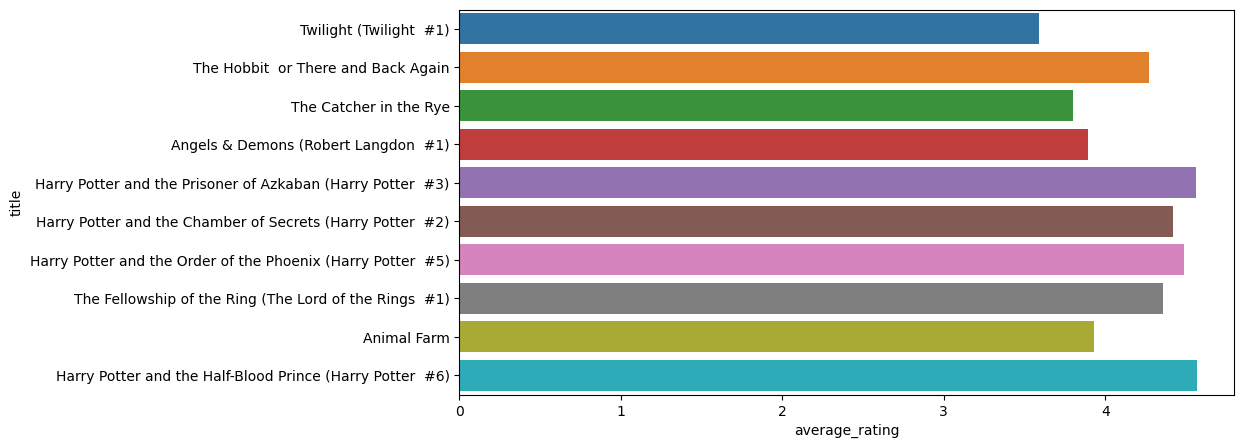

In [9]:
plt.figure(figsize =(10,5))
sns.barplot( y ='title' ,x = 'average_rating', data = top_10_books)

In [10]:
top_10_rating = top_10_books.sort_values(by='average_rating', ascending =False)
top_10_rating['title']

0        Harry Potter and the Half-Blood Prince (Harry ...
3        Harry Potter and the Prisoner of Azkaban (Harr...
1        Harry Potter and the Order of the Phoenix (Har...
4415     Harry Potter and the Chamber of Secrets (Harry...
23       The Fellowship of the Ring (The Lord of the Ri...
1697                   The Hobbit  or There and Back Again
2114                                           Animal Farm
307                   Angels & Demons (Robert Langdon  #1)
1462                                The Catcher in the Rye
10336                              Twilight (Twilight  #1)
Name: title, dtype: object

Text(0.5, 1.0, 'Top 10 Books')

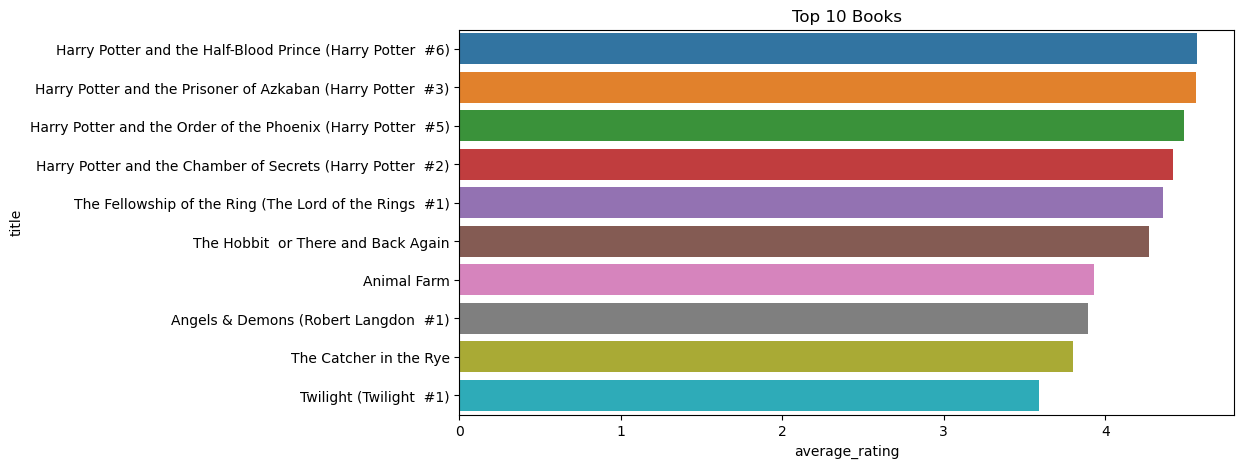

In [11]:

plt.figure(figsize =(10,5))
sns.barplot( y ='title' ,x = 'average_rating', data = top_10_rating)
plt.title('Top 10 Books')

In [12]:
#authors 
book_Aut = df.groupby('authors')['title'].count().reset_index().sort_values('title',ascending =False).head(10)
book_Aut

,authors,title
5786,Stephen King,40
4747,P.G. Wodehouse,40
5470,Rumiko Takahashi,39
4711,Orson Scott Card,35
46,Agatha Christie,33
4987,Piers Anthony,30
4305,Mercedes Lackey,29
5528,Sandra Brown,29
1401,Dick Francis,28
3695,Laurell K. Hamilton,23


Text(0.5, 0, 'BOOKS count')

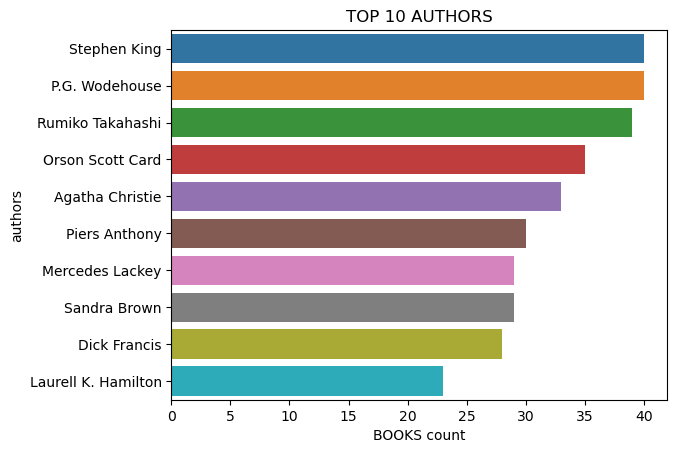

In [13]:
plt.title("TOP 10 AUTHORS")
sns.barplot(y ='authors' ,x='title'  ,data = book_Aut)
plt.xlabel('BOOKS count')

Text(0.5, 1.0, 'Average Rating Distribution')

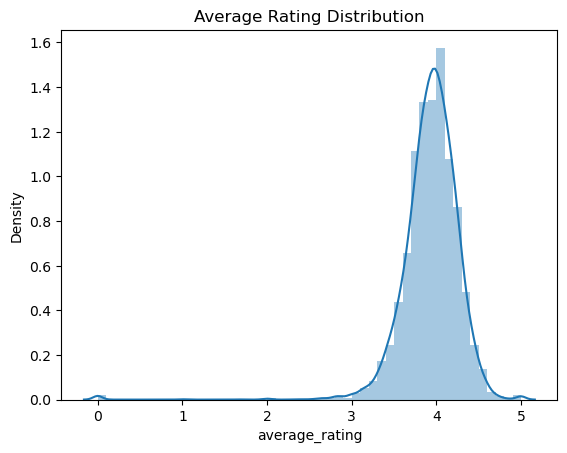

In [14]:
sns.distplot(df['average_rating'])
plt.title('Average Rating Distribution')

<Axes: xlabel='average_rating', ylabel='ratings_count'>

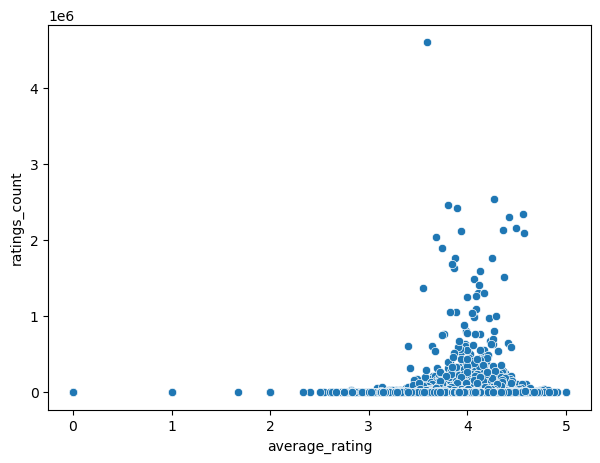

In [15]:
plt.figure(figsize =(7,5))
sns.scatterplot(x=df['average_rating'] ,y=df['ratings_count'])

<Axes: xlabel='average_rating', ylabel='  num_pages'>

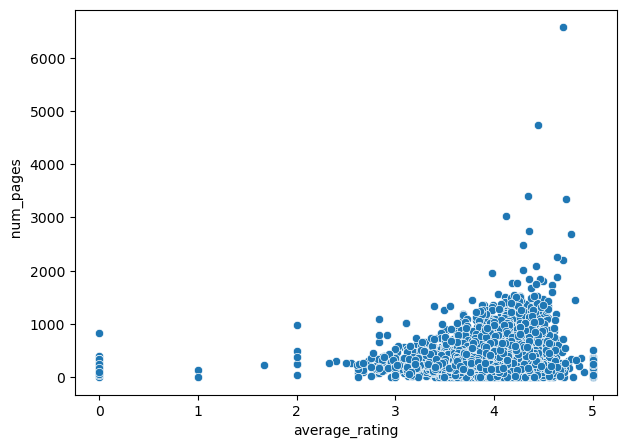

In [16]:
plt.figure(figsize =(7,5))
sns.scatterplot(x='average_rating' ,y='  num_pages' ,data = df)

**DATA PREPROCESSING**

In [17]:
df.select_dtypes('object').columns

Index(['title', 'authors', 'isbn', 'language_code', 'publication_date',
       'publisher'],
      dtype='object')

In [18]:
df2 = df.copy()

df2.loc[(df2['average_rating']>=0)&(df2['average_rating']<=1),'rating between']="between 0 and 1"
df2.loc[(df2['average_rating']>1)&(df2['average_rating']<=2),'rating between']="between 1 and 2"
df2.loc[(df2['average_rating']>2)&(df2['average_rating']<=3),'rating between']="between 2 and 3"
df2.loc[(df2['average_rating']>3)&(df2['average_rating']<=4),'rating between']="between 3 and 4"
df2.loc[(df2['average_rating']>4)&(df2['average_rating']<=5),'rating between']="between 4 and 5"
         

In [19]:
rating_df = pd.get_dummies(df2['rating between'])
lang_df = pd.get_dummies(df2['language_code'])

In [20]:
feature_df = pd.concat([rating_df , lang_df , df2['average_rating'] ,df2['ratings_count'] ],axis =1 )

In [21]:
feature_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [22]:
scaler = MinMaxScaler()
feature_arr = scaler.fit_transform(feature_df)
feature_arr

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.14000000e-01, 4.55816060e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.98000000e-01, 4.68317403e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.84000000e-01, 1.37743803e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92000000e-01, 1.78351363e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.44000000e-01, 1.67258779e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.82000000e-01, 2.45776879e-05]])

**MODEL**

In [23]:
model = neighbors.NearestNeighbors(n_neighbors=8 , algorithm = 'ball_tree')
model.fit(feature_arr)

dist_mat , id_list_mat = model.kneighbors(feature_arr)

In [24]:
#distance matrix with distance from 1st value to others 
dist_mat

array([[0.00000000e+00, 2.03047674e-02, 4.26182285e-02, ...,
        9.59972118e-02, 1.12071674e-01, 1.32200365e-01],
       [0.00000000e+00, 2.03047674e-02, 2.65284290e-02, ...,
        9.31968321e-02, 9.67920519e-02, 1.40569027e-01],
       [0.00000000e+00, 3.58877744e-04, 4.43050887e-04, ...,
        7.45378198e-04, 7.98231102e-04, 8.15631236e-04],
       ...,
       [0.00000000e+00, 3.26252494e-06, 4.35003326e-06, ...,
        1.37026048e-05, 1.41376081e-05, 1.54426181e-05],
       [0.00000000e+00, 1.30500998e-06, 3.48002660e-06, ...,
        1.54426181e-05, 1.97926513e-05, 2.39251829e-05],
       [0.00000000e+00, 1.28325981e-05, 2.41426846e-05, ...,
        2.00000626e-03, 2.00002840e-03, 2.00004401e-03]])

In [25]:
#ids of all close points
id_list_mat 


array([[    0,     1,    23, ...,  7309,  1697,  5270],
       [    1,     0,    23, ...,  1697,  7309,  5270],
       [    2,  2562,  3101, ..., 10838,  6023,  8497],
       ...,
       [11120,  5459,  8599, ...,  3664, 10935,  1418],
       [11121,  1463,  8854, ...,  5740,  7686,  2908],
       [11122,  6343, 10297, ...,  8250, 11107,  7351]], dtype=int64)

**RECOMMENDATION**

In [26]:
def recommend_book(name):
    book_list = []
    book_idx = df2[df2['title'] == name].index
    book_idx = book_idx[0] #iff multiple index found
    for num in id_list_mat[book_idx]:
        book_list.append(df2.loc[num].title)
    return book_list
    

In [27]:
rec_books = recommend_book('Fullmetal Alchemist: The Abducted Alchemist (Fullmetal Alchemist  #2)')
rec_books

['Fullmetal Alchemist: The Abducted Alchemist (Fullmetal Alchemist  #2)',
 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 "In Search of Lost Time  Vol. 2: Within a Budding Grove  Part 2 & The Guermantes' Way",
 "Cook's Illustrated 2005 (Cook's Illustrated Annuals)",
 'Fullmetal Alchemist  Vol. 9 (Fullmetal Alchemist  #9)',
 'Fullmetal Alchemist  Vol. 8 (Fullmetal Alchemist  #8)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'Coffin: The Art of Vampire Hunter D']

In [28]:
rec_books = recommend_book('The Book Thief')
rec_books

['The Book Thief',
 'The Giver (The Giver  #1)',
 'Jane Eyre',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)',
 'Little Women',
 "Charlotte's Web",
 'Memoirs of a Geisha',
 'Water for Elephants']

### ------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
# Little Program
ask = df.title[int(input('Enter any number [ 0 - 11122 ]: '))]
print(ask)
rec_books = recommend_book(input('\nCopy 👆 Movie Name here 👉 '))
print('\nRecommended movies for YOU! ', rec_books)

Enter any number [ 0 - 11122 ]: 1911
Smitten (Elsie Hawkins #2)

Copy 👆 Movie Name here 👉 Smitten (Elsie Hawkins #2)

Recommended movies for YOU!  ['Smitten (Elsie Hawkins #2)', 'Evelina', 'House Harkonnen (Prelude to Dune #2)', 'Finnegans Wake', 'The Rocky Road to Romance (Elsie Hawkins #4)', 'Valentine Princess (The Princess Diaries  #7.75)', 'The Brief History of the Dead', 'The Diary of Ellen Rimbauer: My Life at Rose Red']
